# Knowledge Data Discovery and Neural Networks : Final Project

In [0]:
Name: Ness Ganon    ID: 305351413
Name: Matan Kadosh    ID: 305720450

In this notebook we will prepare data and run several algorithms for classification

# 1. Imports

In [10]:
# add more packages in this section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import math
SEED=42
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%config InlineBackend.figure_format='retina'
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

# 2. data preperation

In [11]:
data = pd.read_csv("adult.data", header = None, na_values=' ?')
cols = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss'
    ,'hours_per_week','native_country','y']
data.columns = cols
pd.set_option('display.max_columns', 150)

data.drop(['education_num'], axis=1, inplace=True)


## 2.1 Categorical feature handling
* Name two machine learning algorithms that can deal with categorical features without special handling.


#### YOUR VERBAL SOLUTION HERE

Decision trees and Random forests, if deep enough, can handle categorical variables without one-hot encoding and special handling.

StringIndexer: StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels], ordered by label frequencies, so the most frequent label gets index 0. If the input column is numeric, we cast it to string and index the string values. you must set the input column of the component to this string-indexed column name.

#### END YOUR VERBAL SOLUTION HERE

## 2.2 One hot encoding 

* Remove the y column from the data variable and save it to the variable y
* Transform the categorical columns to one hot encoding

You may find get_dummies function in pandas useful

In [12]:
# Filling missing data is by using the mode
data['native_country'].fillna(data['native_country'].mode()[0],inplace=True)
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)

In [13]:
### YOUR CODE HERE
y = data['y']
data_OHE=data.select_dtypes(exclude=["number"]).drop(['y'], axis=1, inplace=False)
data_OHE = pd.get_dummies(data_OHE.astype('category'))
data_OHE
### END YOUR CODE

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,1,0,0,0,0,0,0,0,0,0,

## 2.3 Train test split

* Convert the y column - replace <=50K with 0 and >50K with 1 
* Split the dataset into train and test set (use 15% for the test set)

at the end, make sure you have the following variables:

* X
* y
* X_train
* X_test
* y_train
* y_test

You may find sklearn train_test_split useful

In [14]:
### YOUR CODE HERE
data['y'] = data['y'].replace({' <=50K':0, ' >50K':1}).astype(int)
y = pd.Series(data['y'],
              name='y').to_frame()
X = data_OHE
X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.15, random_state=1)
X.iloc[X_train]

### END YOUR CODE

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
18504,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19088,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15661,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18036,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18183,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32511,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5192,0,0,0,1

## 2.3 Numeric feature normalization

* Scale the numeric features to to have zero mean (z score normalization)

- Don't scale the boolean features

You may find sklearn StandardScaler useful

In [15]:
### YOUR CODE HERE
#Scaling numeric features
X_int = StandardScaler().fit_transform(data.select_dtypes(exclude=['object']))

cols_int = ['age', 'fnlwgt','capital_gain', 'capital_loss'
    ,'hours_per_week','y']

X_int=pd.DataFrame(X_int, columns=cols_int)
X_int.drop(['y'], axis=1, inplace=True)
X_int

#one hot encoding:
Encoded_Data=pd.concat([X_int,data_OHE],axis=1, join='inner')

X = Encoded_Data
X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.15, random_state=1)

### END YOUR CODE

# 3 Models


Create a function cv(x, y, model) (cv stands for cross validation) that gets a model (sklearn classifier) and the data.
The function should fit the model using k fold cross validation with k = 5, and print the 'roc_auc' on each fold (which is the scoring parameter for the cross val_score function).

Computing cross-validated metrics

In [91]:
#cross- Val function
def cv(x, y, model, model_name):
    print(__doc__)

    # Classification and ROC analysis
    x = x.iloc[1:500,:].to_numpy()
    y = y['y'].iloc[1:500].values
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=5)


    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(x, y)):
        classifier.fit(x[train], y[train])
        viz = plot_roc_curve(classifier, x[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="roc AUC-5 k fold cross validation, "+model_name+" model")
    ax.legend(loc="lower right")
    plt.show()

## 3.1 Baseline model - logistic regression
Our first algorithm will be logistic regression, since it's always nice to know how well can we do with a simple algorithm.
* Should we use class_weight = 'balanced' in sklearn logistic regression? why?
* Check how the results differ with and without the 'balanced' parameter - use `cv(x, y, model)` for that purpose, explain your answer
* Fit a model on X_train, y_train and plot the precision recall curve on the test data.
* If we would plot this curve on each fold (of the 5 folds in the cross validation), would we get exactly the same plot?

Do not change other hyperparameters

[precision recall curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

Automatically created module for IPython interactive environment


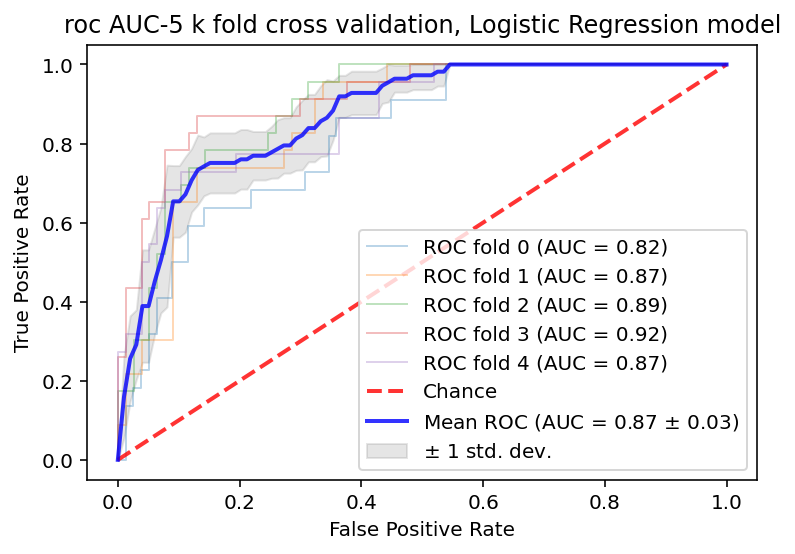

In [17]:
# Logistic Regression without "balanced" parameter (K-fold)
classifier = LogisticRegression(random_state=None, max_iter=200)
model = classifier
cv(X, y, model,'Logistic Regression')

Automatically created module for IPython interactive environment


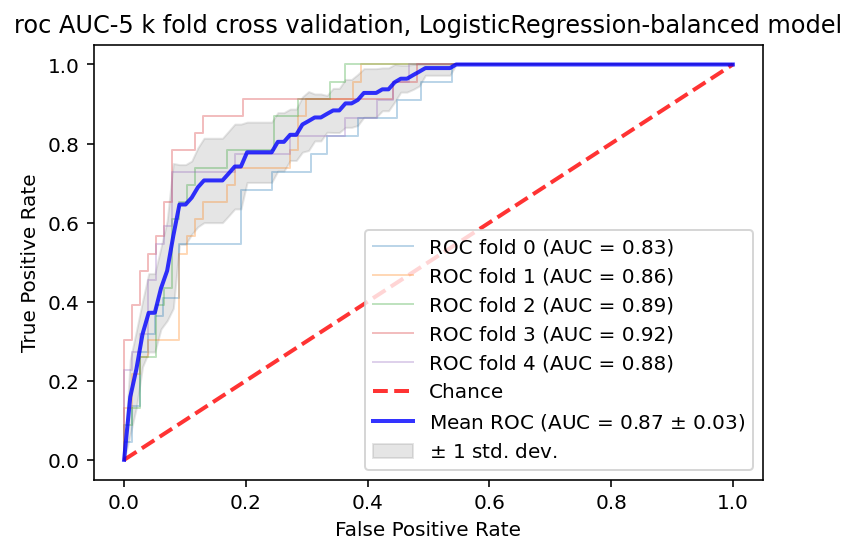

In [18]:
#Logistic Regression with "balanced" parameter (K-fold)
classifier = LogisticRegression(class_weight='balanced',random_state=None, max_iter=180)
model = classifier
cv(X, y, model,'LogisticRegression-balanced' )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression classifier on test set: 0.85


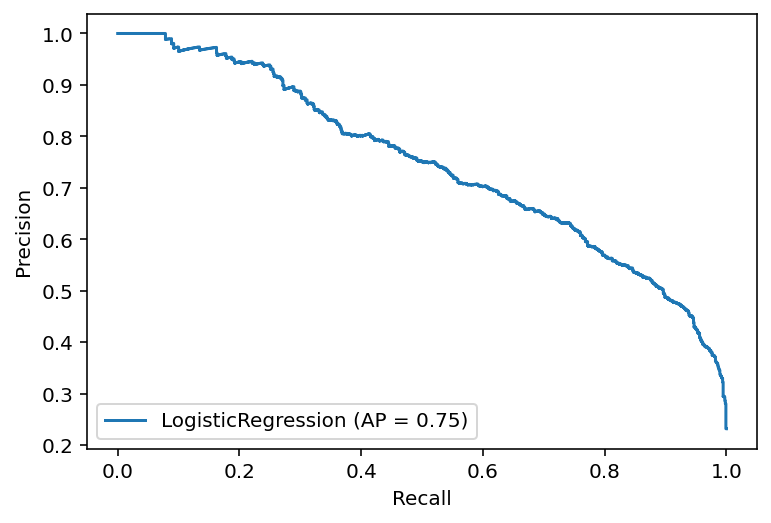

In [19]:
## YOUR CODE HERE
# Logistic Regression on train and valid sets + precision recall curve

logreg = LogisticRegression(random_state=SEED, max_iter=180)
logreg.fit(X.iloc[X_train], y_train['y'].values)
y_pred = logreg.predict(X.iloc[X_test])

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X.iloc[X_test],          y_test['y'].values)))
disp = plot_precision_recall_curve(logreg, X.iloc[X_test],y_test['y'].values)
## END YOUR CODE

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression classifier on test set: 0.80


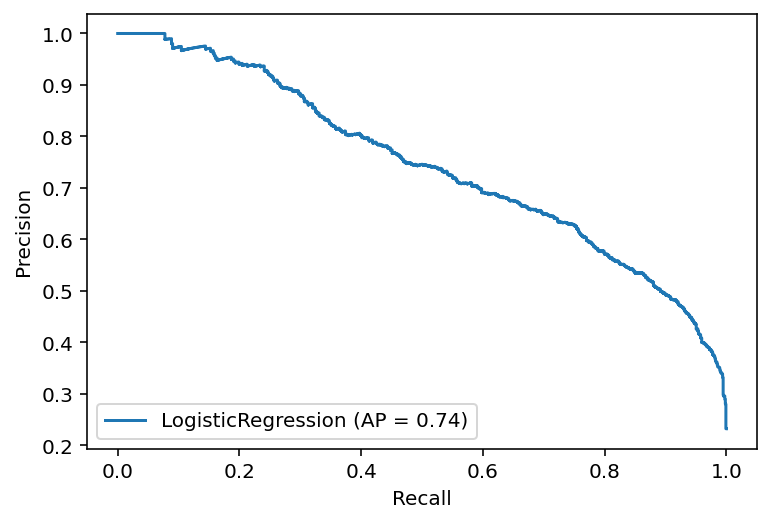

In [20]:
## YOUR CODE HERE
# Logistic Regression on train and valid sets + "balanced"parameter + precision recall curve
logreg = LogisticRegression(class_weight='balanced',random_state=SEED, max_iter=180)
logreg.fit(X.iloc[X_train], y_train['y'].values)
y_pred = logreg.predict(X.iloc[X_test])

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X.iloc[X_test],         y_test['y'].values)))
disp = plot_precision_recall_curve(logreg, X.iloc[X_test],y_test['y'].values)

## END YOUR CODE

#### YOUR VERBAL SOLUTION HERE
1. The answer depends on the preforming Index, in case we look on accuracy we should use the "balanced" parameter since 75% of our observations are low income. If we look on other preforming Indexes such as recall or precision the number will be less affected by it.

2. No real differences were observed by using balanced or not using it, since AUC curve not affected by     imbalanced Dataset.
4. No, we see some variation that also relates to number of iterations and number of folds.In each fold we have different collection of values and it changes the precision recall in accordance.


#### END YOUR VERBAL SOLUTION HERE

## 3.2 ANN
ANN (MLPClassifier in sklearn):

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters

In [21]:
### YOUR CODE HERE
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


classifier = MLPClassifier(random_state=1).fit(X.iloc[X_train], y_train['y'].values)
classifier.predict_proba(X.iloc[X_test])
classifier.score(X.iloc[X_test], y_test['y'].values)


#cv(X, y, classifier,'ANN' )
### END YOUR CODE

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8468781985670419

In [22]:
#ANN AUC
y_pred = classifier.predict(X.iloc[X_test])
y_test['y'].values
metrics.roc_auc_score(y_test['y'].values, y_pred, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)


0.7544703580871452

In [23]:
#ANN LogLoss


logloss_Ann = metrics.log_loss(y_test['y'].values, classifier.predict_proba(X.iloc[X_test]), eps=1e-15, normalize=True, sample_weight=None, labels=None)

p_avg = math.exp(-logloss_Ann)

print("Logloss ANN model is %.4f, average probability predictions of %f for each y"%(logloss_Ann,p_avg))

Logloss ANN model is 0.3543, average probability predictions of 0.701687 for each y


#### YOUR VERBAL SOLUTION HERE

Log-loss and AUC carve score are relatively low compared to the baseline. if we could change the default hyperparameters, the models could be better fitted to the data set and might achieving better results.

The ANN model improves the more you train it, with a larger data set we could get better results.
#### END YOUR VERBAL SOLUTION HERE

## 3.3 Random forest
Random Forest classifier:

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters


In [24]:
classifier_RF = RandomForestClassifier(oob_score=True,random_state=42)
classifier_RF.fit(X.iloc[X_train], y_train['y'].values)

predicted_RF = classifier_RF.predict(X.iloc[X_test])
accuracy_RF = accuracy_score(y_test['y'].values, predicted_RF)
print(f'Out-of-bag score estimate: {classifier_RF.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy_RF:.3}')


Out-of-bag score estimate: 0.85
Mean accuracy score: 0.857


In [25]:
#AUC RandomForest:
y_pred_RF = classifier_RF.predict(X.iloc[X_test])
y_test['y'].values
metrics.roc_auc_score(y_test['y'].values, y_pred_RF, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

0.7773852417050021

In [26]:
#Log loss RandomForest:

logloss_RF = metrics.log_loss(y_test['y'].values, classifier.predict_proba(X.iloc[X_test]), eps=1e-15, normalize=True, sample_weight=None, labels=None)

p_avgRF = math.exp(-logloss_RF)

print("Logloss RandomForest model is %.4f, average probability predictions of %f for each y"%(logloss_RF,p_avgRF))


Logloss RandomForest model is 0.3543, average probability predictions of 0.701687 for each y


#### YOUR VERBAL SOLUTION HERE

AUC score still low compared to the base line model.
As we wrote for ANN model changing the hyperparameters can be very helpful in improving model performance.


#### END YOUR VERBAL SOLUTION HERE

## 3.4 Confusion matrix
Plot/print the confusion matrix of the random forest model on the test data

Explain shortly your results

[Text(0, 0.5, 'Income > 50 K'), Text(0, 1.5, 'Income < 50 K')]

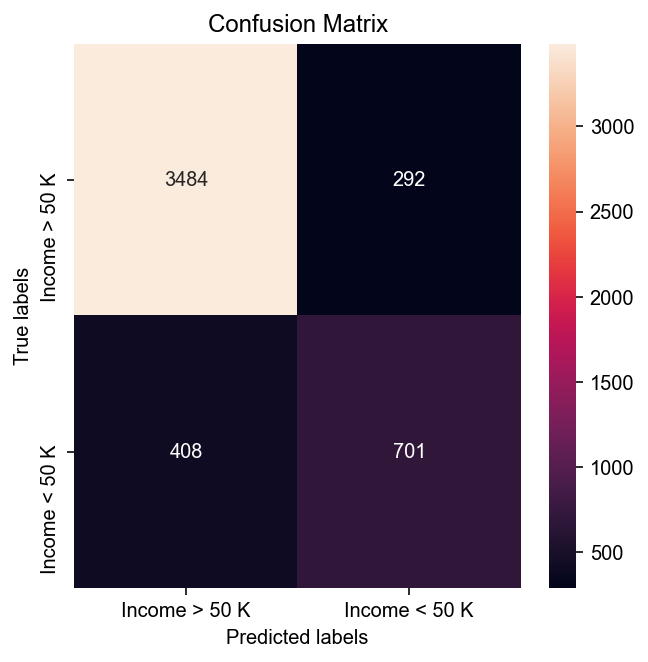

In [27]:
### YOUR CODE HERE
cm = confusion_matrix(y_test, y_pred_RF)
fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1)
ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < 50 K'])
### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE
To identify the errors, we use the Confusion matrix.
Proportional, we can see many mistakes type 2 (FN), and good forecast for a high salary (TP).

#### END YOUR VERBAL SOLUTION HERE

## 3.4 Global feature importance of the random forest and SHAP

* Plot the global feature importance of the features - use SHAP for this purpsose
* Choose two samples from the dataset and plot/print the local explanations for this samples. Explain which features
are important
* Explain in few words how this feature importance is calculated

**SHAP can be very slow on the random forest model. Thus, train another model with shallow trees (depth <7 for example) and you can also compute the SHAP values on a small data set. If it is yet very slow you, try to fit a different classifier for this purpose (MLP for example or GradientBoostingClassifier). You can also discard the binary features (which derived from the categorical features) for this purpose and stay only with the numerical ones.**


In [0]:
### YOUR CODE HERE

# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=10)
predictions= model.fit(X.iloc[X_train], y_train['y'].values)

import shap
shap_values = shap.TreeExplainer(model).shap_values(X.iloc[X_train])
shap.summary_plot(shap_values,X.iloc[X_train], plot_type="bar")

### END YOUR CODE

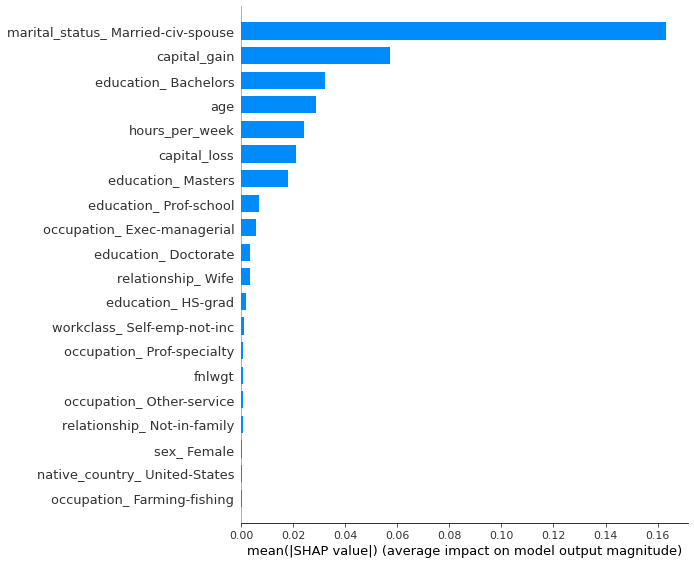

In [0]:
# Creating new Sample of the data:
New_Data=pd.concat([X,y],axis=1)
Sample_1=New_Data.sample(frac=0.88, random_state=18)

y1 = Sample_1['y']

data_Sample_1= Sample_1.drop(['y'], axis=1)
data_Sample_1

y1 = pd.Series(y1,
              name='y').to_frame()

X1 = data_Sample_1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=10)
predictions= model.fit(X1_train, y1_train)

import shap
shap_values = shap.TreeExplainer(model).shap_values(X1_train)
shap.summary_plot(shap_values,X1_train, plot_type="bar")

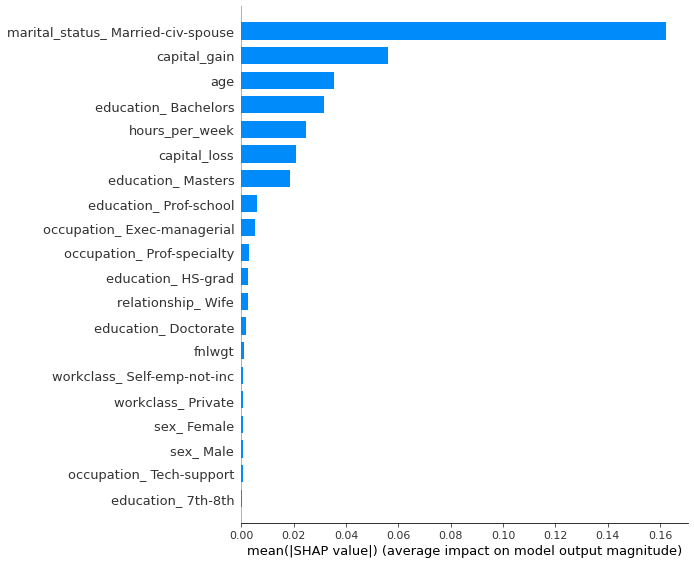

In [0]:
# Creating new Sample of the data:
New_Data=pd.concat([X,y],axis=1)
Sample_1=New_Data.sample(frac=0.90, random_state=17)

y1 = Sample_1['y']

data_Sample_1= Sample_1.drop(['y'], axis=1)
data_Sample_1

y1 = pd.Series(y1,
              name='y').to_frame()

X1 = data_Sample_1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=7, random_state=17, n_estimators=10)
predictions= model.fit(X1_train, y1_train)

import shap
shap_values = shap.TreeExplainer(model).shap_values(X1_train)
shap.summary_plot(shap_values,X1_train, plot_type="bar")

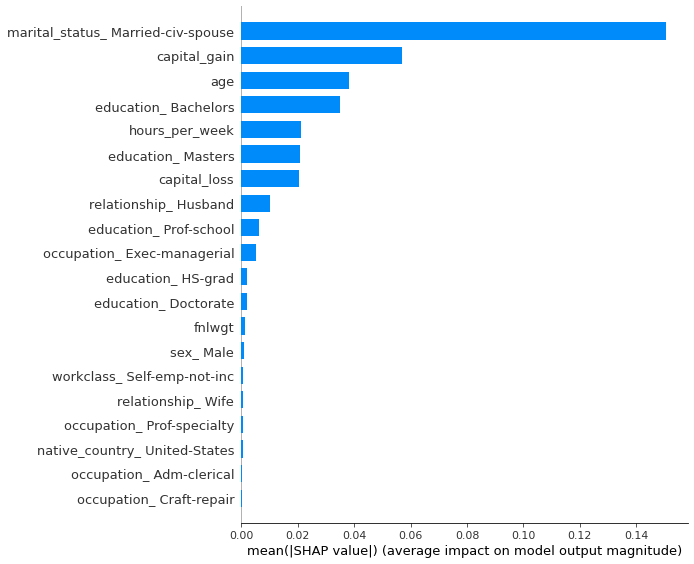

#### YOUR VERBAL SOLUTION HERE

Shap feature importance is based on assigning the individual contribution of each feature in the model to the explanation power of the prediction. The SHAP is based on game theory optimization and it looks on the marginal effect of each feature  in the model, after looking on the different prediction of each feature on each observations with the other features. This is why this model is also can be very "heavy" for running.
  



#### END YOUR VERBAL SOLUTION HERE

## 4 Clustering
Imagine that we don't really know the true labels -> we need to use unsupervised machine learning.

* Perform k means on X_train with k = 2. Is our clusters represent rich and poor people (does one cluster represent 'rich' ('>= 50k') people and the other 'poor' people)?

* Do the same with dbscan, understand how many clusters did you get and the proportion of 'rich' and 'poor' people in each cluster.

* Plot the clusters using pca (only for the kmeans). Are they seperated in the PCA dimension?
 
This question is more open minded and you can (recomended) use graphs that explain how well did the clustering work. Did it work well?? 

In [28]:
### YOUR CODE HERE


kmeans = KMeans(n_clusters=2, random_state=0).fit(X.iloc[X_train])
cluster_pred_km = kmeans.predict(X.iloc[X_train])

cluster_pred_km


### END YOUR CODE

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [29]:
X5 = X.iloc[X_train]

# Compute DBSCAN
db = DBSCAN().fit(X5)
labels = db.labels_

# Number of clusters in labels.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 247


In [94]:


unique_elements, counts_elements = np.unique(labels, return_counts=True)



yadd = y_train
labelsdf = pd.DataFrame({'unique_elements':unique_elements, 'counts_elements':counts_elements})
sum_yadd = pd.DataFrame({'labels':labels, 'y':yadd['y']})
sum_yadd = sum_yadd.groupby(['labels']).agg({'y': 'sum'})
sum_yadd = sum_yadd.iloc[1:]
labelsdf = labelsdf.iloc[1:]
labelsdf['y_sum'] = sum_yadd['y'].values
labelsdf['percent rich'] = labelsdf['y_sum']/labelsdf['counts_elements']

labelsdf


,unique_elements,counts_elements,y_sum,percent rich
1,0,96,48,0.500000
2,1,570,171,0.300000
3,2,15,2,0.133333
4,3,19,1,0.052632
5,4,92,0,0.000000
...,...,...,...,...
243,242,5,0,0.000000
244,243,5,0,0.000000
245,244,5,0,0.000000
246,245,5,1,0.200000


Text(0.5, 1.0, 'PCA - K-mean k=2')

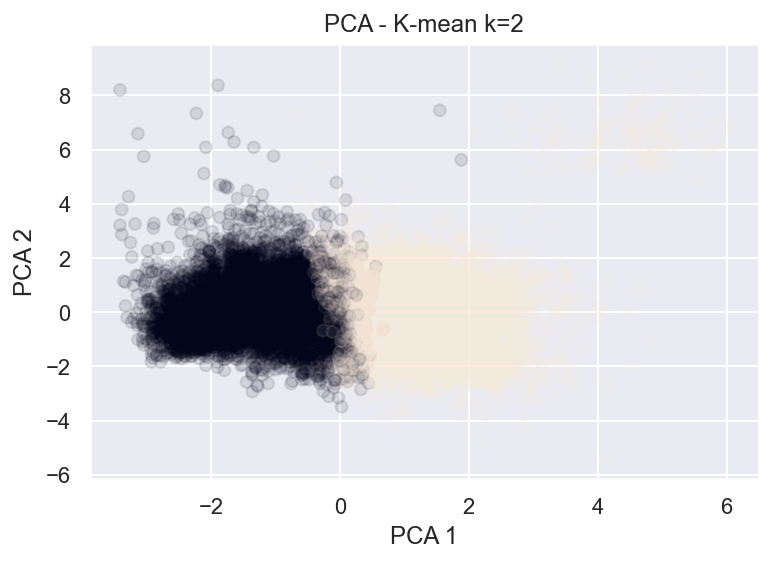

In [31]:
#PCA - K-mean k=2

X_std = X5
# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, c=cluster_pred_km)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA - K-mean k=2')

Text(0.5, 1.0, 'PCA -y-test')

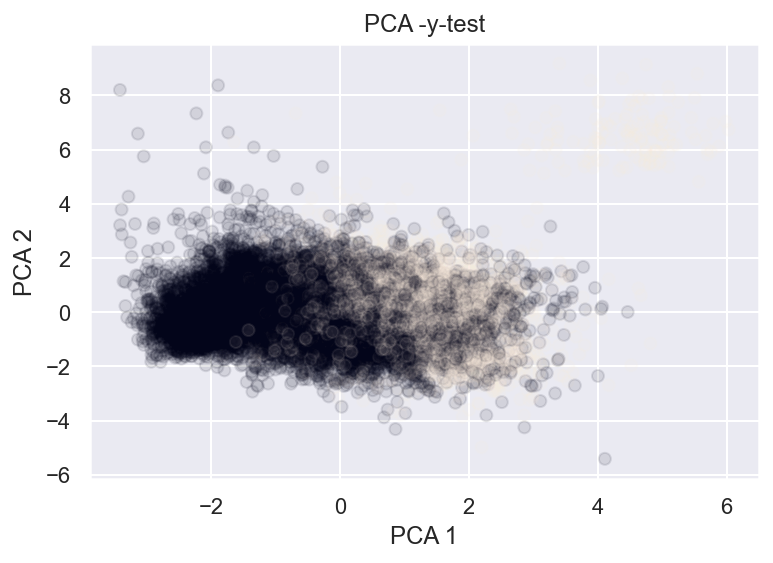

In [32]:
#without k-mean color by y_train:

PCA_components = pd.DataFrame(principalComponents)
PCA_components
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, c=y_train['y'].values)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA -y-test')

#### YOUR VERBAL SOLUTION HERE
1. No, the clusters not represent rich and poor people, It divides people into two different groups depending on the distances between them. And it doesn't represent the target variable.

2. Without changing the parameters, the number of clusters is high (247), and with a lot of noise (-1). Epsilon  and the minimum number of neighbors parameters can be changed to reach for two clusters. But even in this case the model defines a lot of points as noise in the model (not outliners).

3. We got two clusters in PCA dimension. k-mean does a good job,and dividing the area into two distinct parts. it's possible to refine the division and get less overlap between the areas. (block49)

4. In PCA dimension y_test, We tried to see if there is a match between the Kmean results and y test, but we couldn't see clear groups division(block50) as we see in clear grops in PCA-knn plot.

#### END YOUR VERBAL SOLUTION HERE